In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def match_directories(base_directory):
    temp_dict = {}
    symmetry_dict = {}
    energy_dict = {}

    for _, _, files in os.walk(base_directory):
        for file in files:
            file_parts = file.split("-")

            energy = file_parts[0]
            symmetry = file_parts[1]
            temperature = file_parts[2].replace(".txt", "")

            temp_key = (energy, symmetry)
            symmetry_key = (energy, temperature)
            energy_key = (symmetry, temperature)

            if temp_key not in temp_dict:
                temp_dict[temp_key] = []
            if symmetry_key not in symmetry_dict:
                symmetry_dict[symmetry_key] = []
            if energy_key not in energy_dict:
                    energy_dict[energy_key] = []

            temp_dict[temp_key].append(file)
            symmetry_dict[symmetry_key].append(file)
            energy_dict[energy_key].append(file)

    return temp_dict, symmetry_dict, energy_dict

In [3]:
def plot_datasets(files_dict, log_scale: False, mode: str):
    if mode=='temp_dict':
        color_map = {
            "0.03K": "blue",
            "1K": "aqua",
            "4K": "deepskyblue",
            "70K": "orange",
            "300K": "tomato"
        }
    elif mode=='symmetry_dict':
        color_map = {
            "symmetric": "blue",
            "asymmetric": "aqua",
        }
    elif mode=='energy_dict':
        color_map = {
            "0.25": "orange",
            "0.35": "tomato",
        }

    markers = ['o', 's', '^', 'D', '*']
    marker_index = 0
    plt.figure(figsize=(10, 6))
    for filename, data in files_dict.items():
        file_parts = filename.split("-")

        energy = file_parts[0]
        symmetry = file_parts[1]
        temperature = file_parts[2].replace(".txt", "")
        if mode=='temp_dict':
            for i, data in enumerate(data):
                plt.plot(
                    data["Voltage (V)"], data["Current (A)"],
                    marker=markers[marker_index % len(markers)],
                    color=color_map.get(temperature, "pink"),
                    label=f"temperature={temperature}"
                )
                plt.title(f"Drain Current vs. Drain Voltage Characteristics for {symmetry} contract inputs and up spin energy {energy}")

                plt.xlabel("Voltage (V)")
                if log_scale == True:
                    plt.ylabel("Current (A) (Log scale)")
                else:
                    plt.ylabel("Current (A)")
                if log_scale == True:    
                    plt.yscale("log", base=10)
                plt.legend()
                plt.grid(True, which="both", linestyle="--", linewidth=0.5)

                marker_index += 1
        elif mode=='symmetry_dict':
            for i, data in enumerate(data):
                plt.plot(
                    data["Voltage (V)"], data["Current (A)"],
                    marker=markers[marker_index % len(markers)],
                    color=color_map.get(symmetry, "pink"),
                    label=f"symmetry={symmetry}"
                )
                plt.title(f"Drain Current vs. Drain Voltage Characteristics for temperature {temperature} contract inputs and up spin energy {energy}")

                plt.xlabel("Voltage (V)")
                if log_scale == True:
                    plt.ylabel("Current (A) (Log scale)")
                else:
                    plt.ylabel("Current (A)")
                if log_scale == True:    
                    plt.yscale("log", base=10)
                plt.legend()
                plt.grid(True, which="both", linestyle="--", linewidth=0.5)

                marker_index += 1
        elif mode=='energy_dict':
            for i, data in enumerate(data):
                plt.plot(
                    data["Voltage (V)"], data["Current (A)"],
                    marker=markers[marker_index % len(markers)],
                    color=color_map.get(energy, "pink"),
                    label=f"energy={energy}"
                )
                plt.title(f"Drain Current vs. Drain Voltage Characteristics for temperature {temperature} contract inputs and {symmetry} barriers")

                plt.xlabel("Voltage (V)")
                if log_scale == True:
                    plt.ylabel("Current (A) (Log scale)")
                else:
                    plt.ylabel("Current (A)")
                if log_scale == True:    
                    plt.yscale("log", base=10)
                plt.legend()
                plt.grid(True, which="both", linestyle="--", linewidth=0.5)

                marker_index += 1
    if mode=='temp_dict':
        if log_scale == True:
            save_directory  = f"plots/temperature/log_scale"
        else:      
            save_directory  = f"plots/temperature/natural_scale"
        os.makedirs(save_directory, exist_ok=True)
        file_name = f"{energy}_{symmetry}.png"
        file_path = os.path.join(save_directory, file_name)
        plt.savefig(file_path, format="png", dpi=300)
    elif mode=='symmetry_dict':
        if log_scale == True:
            save_directory  = f"plots/symmetry/log_scale"
        else:      
            save_directory  = f"plots/symmetry/natural_scale"
        os.makedirs(save_directory, exist_ok=True)
        file_name = f"{temperature}_{energy}.png"
        file_path = os.path.join(save_directory, file_name)
        plt.savefig(file_path, format="png", dpi=300)
    elif mode=='energy_dict':
        if log_scale == True:
            save_directory  = f"plots/energy/log_scale"
        else:      
            save_directory  = f"plots/energy/natural_scale"
        os.makedirs(save_directory, exist_ok=True)
        file_name = f"{temperature}_{symmetry}.png"
        file_path = os.path.join(save_directory, file_name)
        plt.savefig(file_path, format="png", dpi=300)

    plt.show()

In [4]:
base_directory= "data/single-QD"
# base_directory= "data/double-QD"
temp_dict, symmetry_dict, energy_dict = match_directories(base_directory)

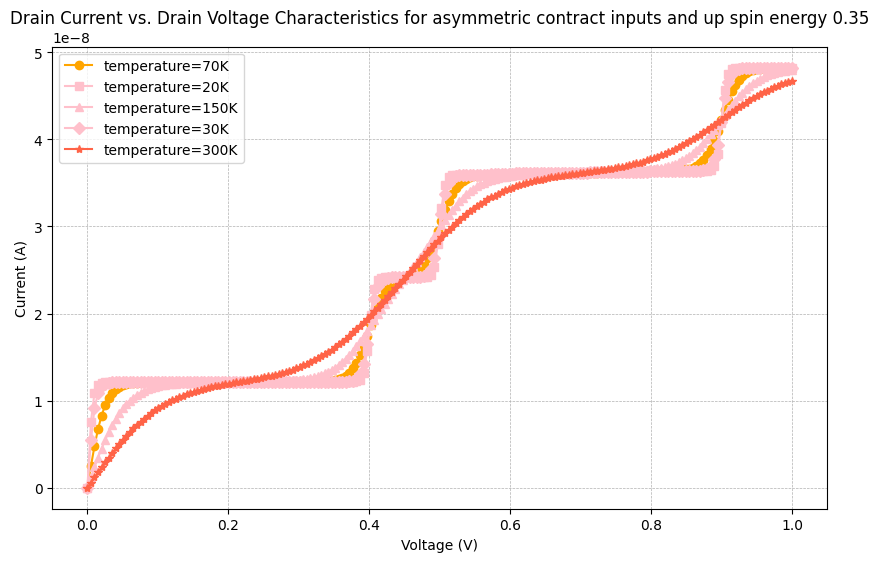

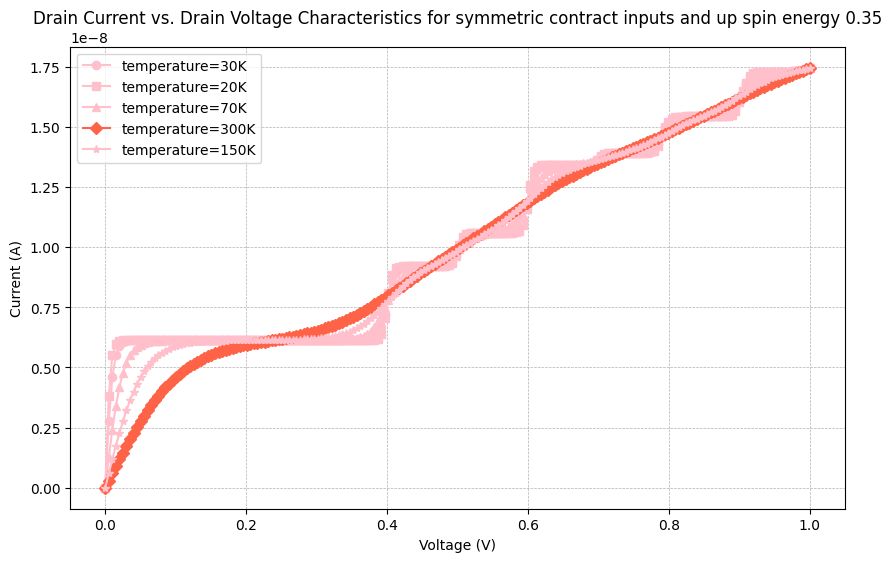

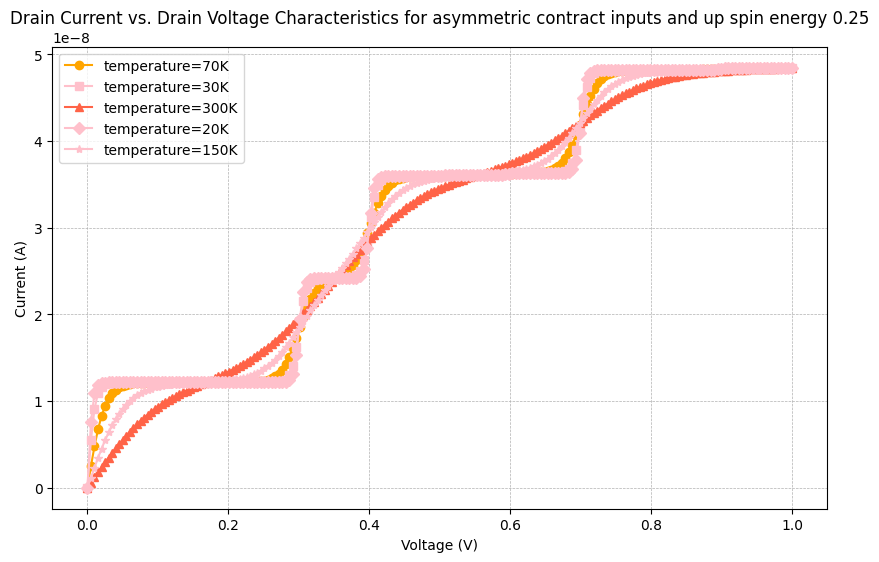

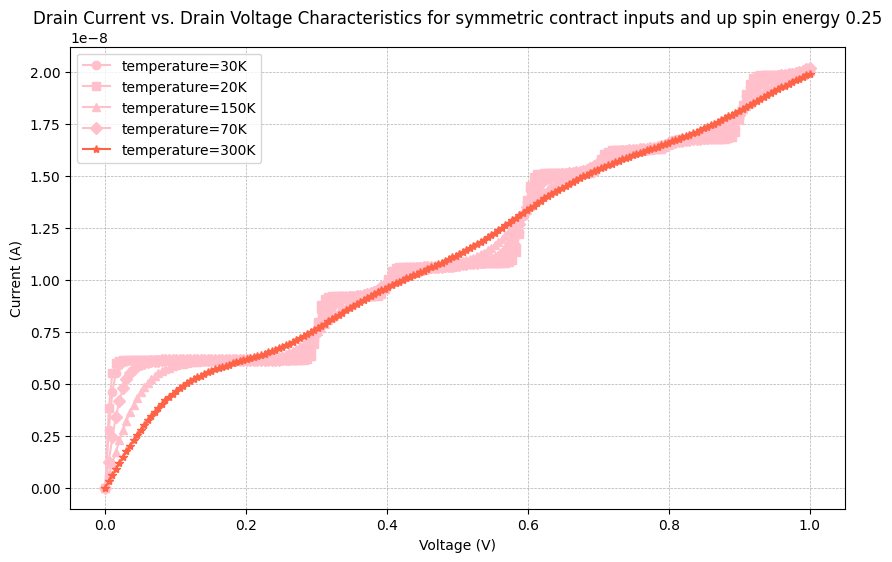

In [5]:
for filenames in temp_dict.values():
    files_dict = {}
    for filename in filenames:
        key = filename
        if key not in files_dict:
            files_dict[key] = []

        data = pd.read_csv(os.path.join(base_directory, filename), skiprows=4, names=["Voltage (V)", "Current (A)"])
        data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
        data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

        files_dict[filename].append(data)
        
    plot_datasets(files_dict, log_scale=False, mode='temp_dict')

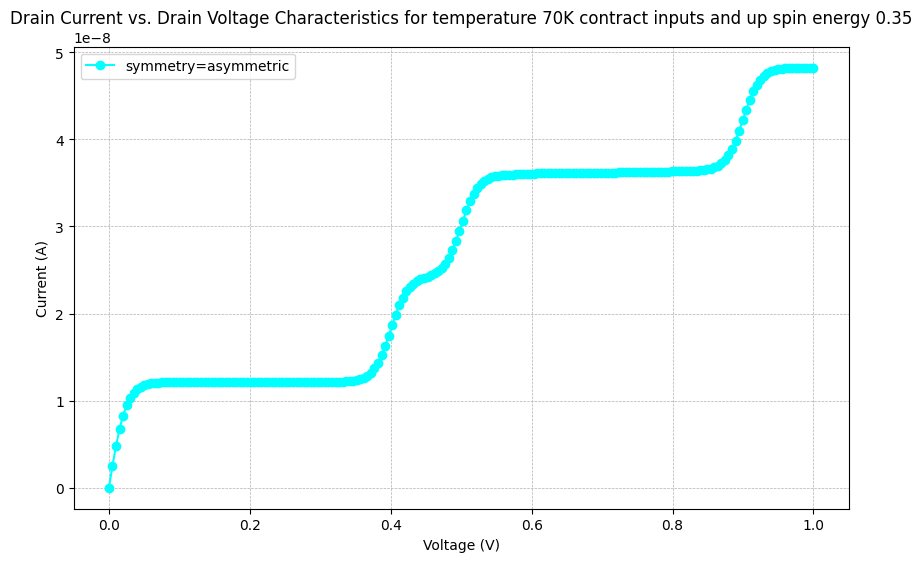

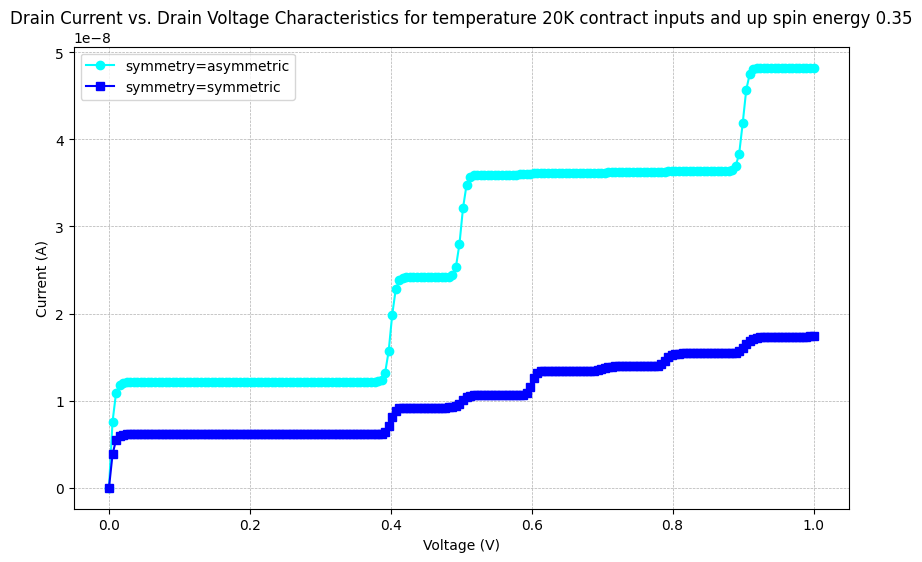

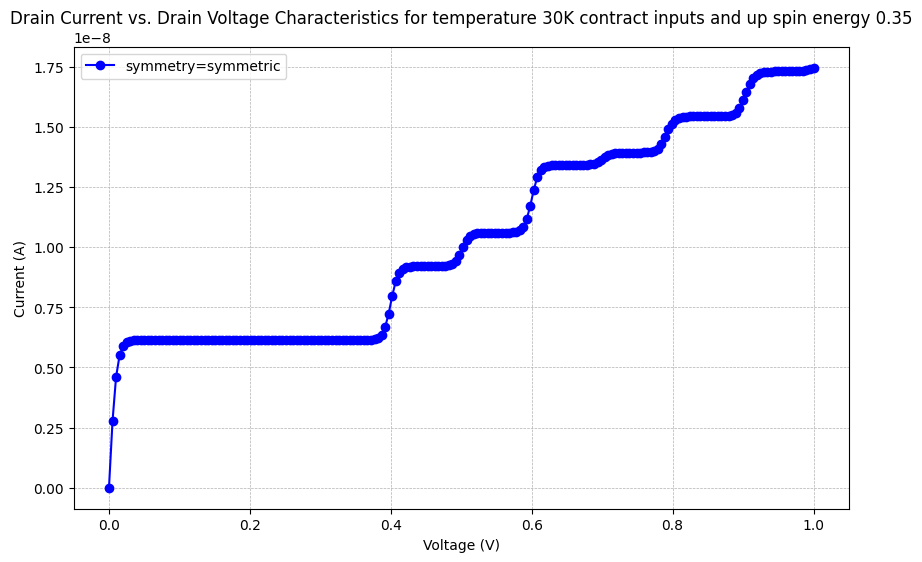

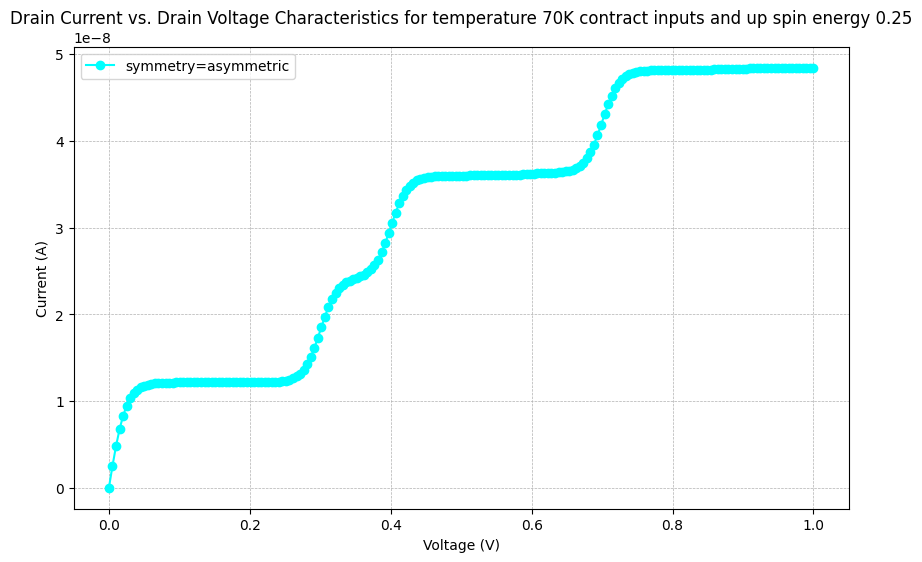

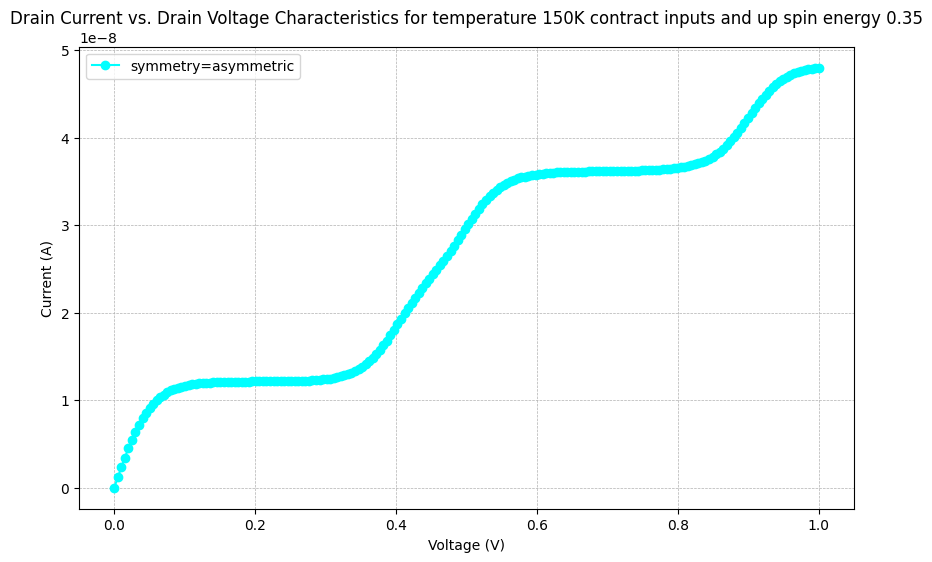

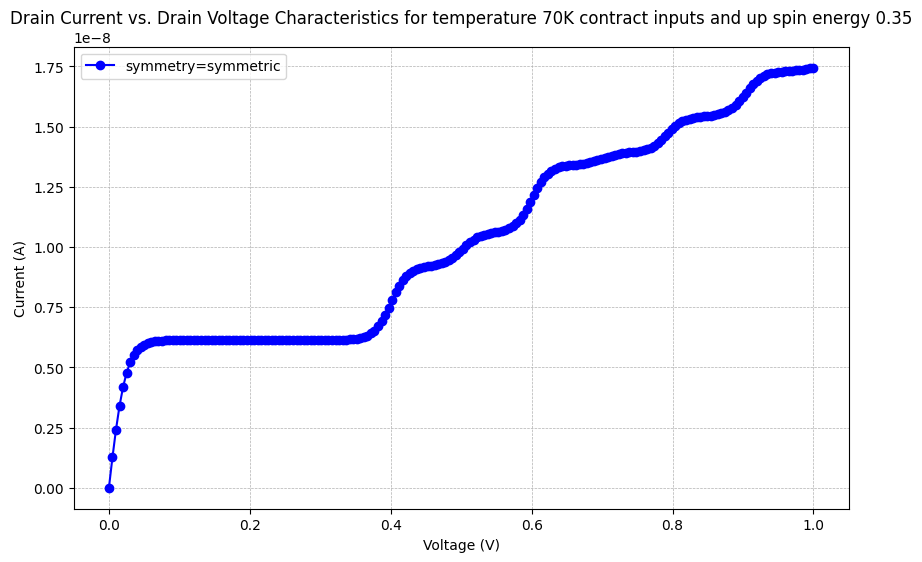

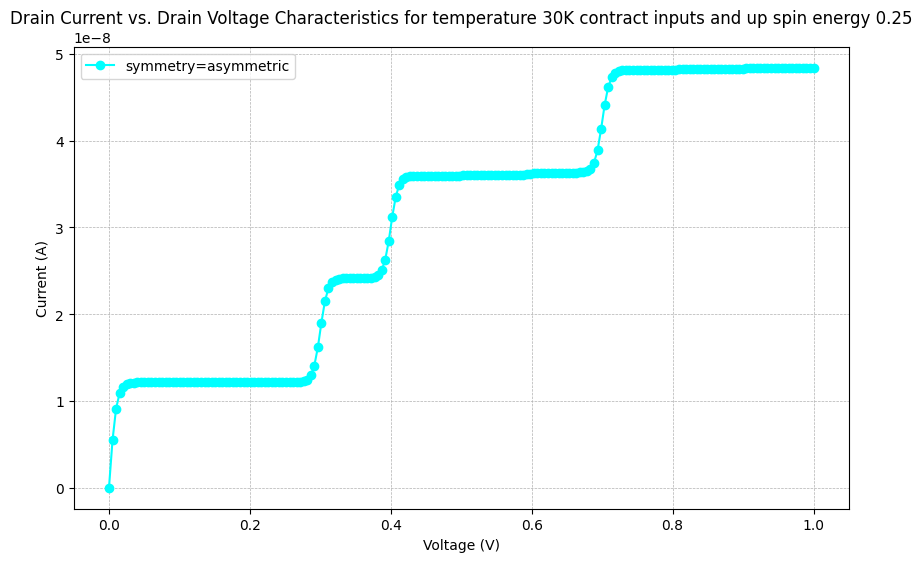

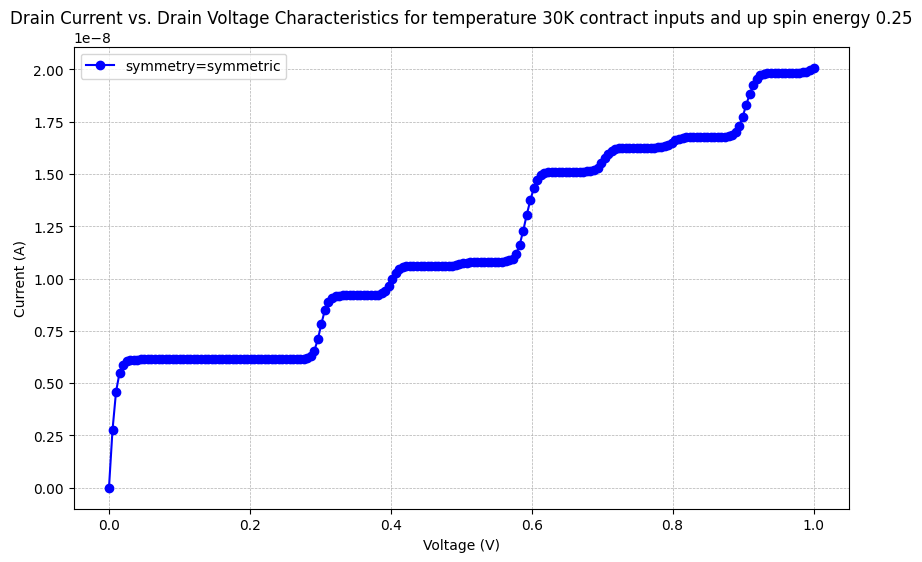

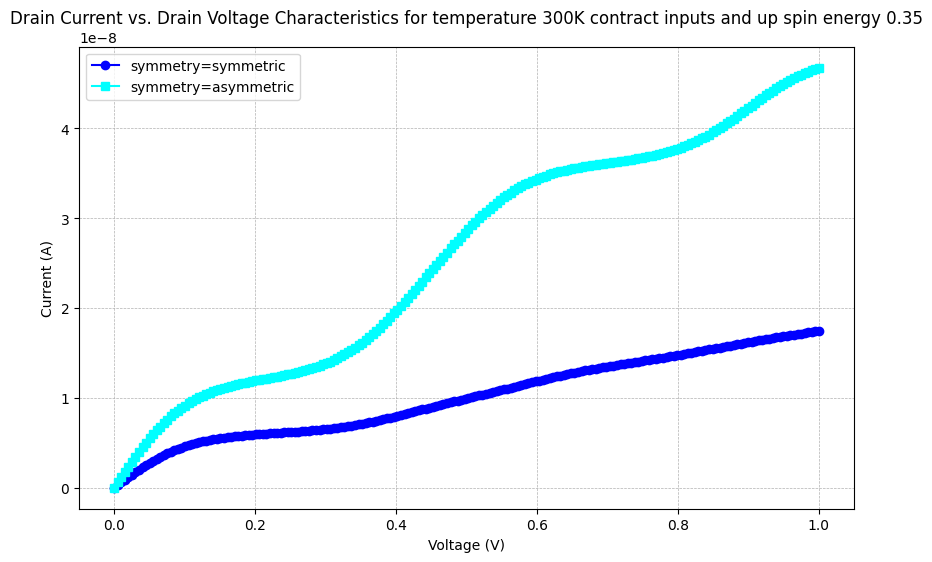

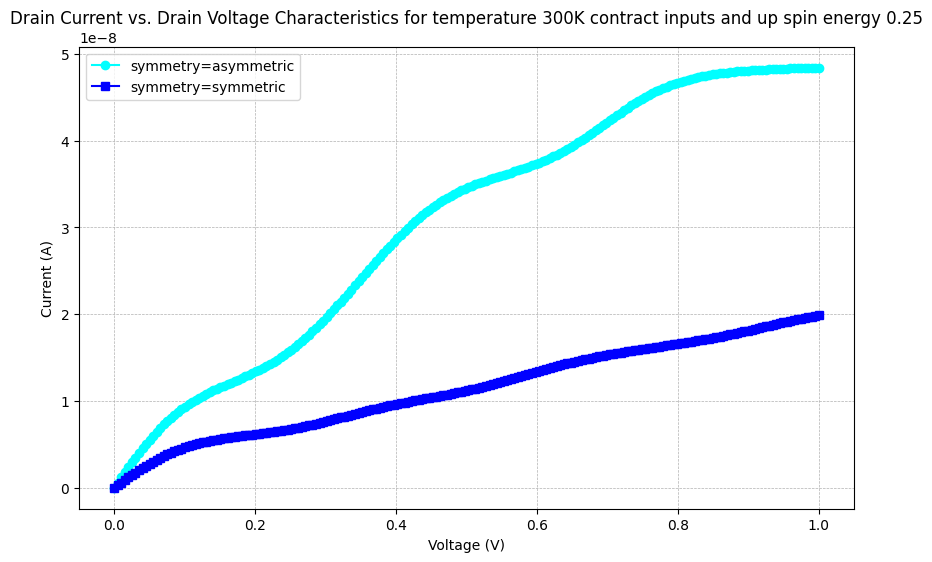

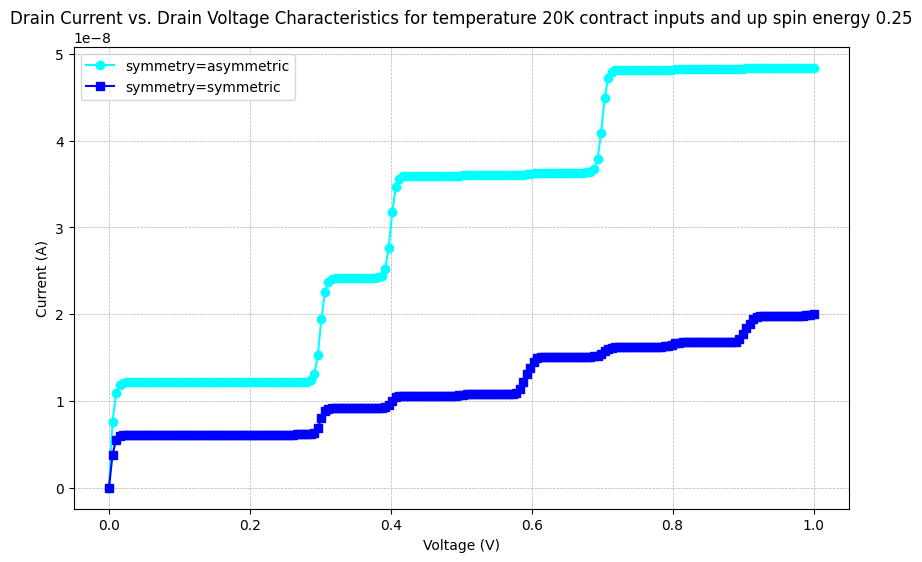

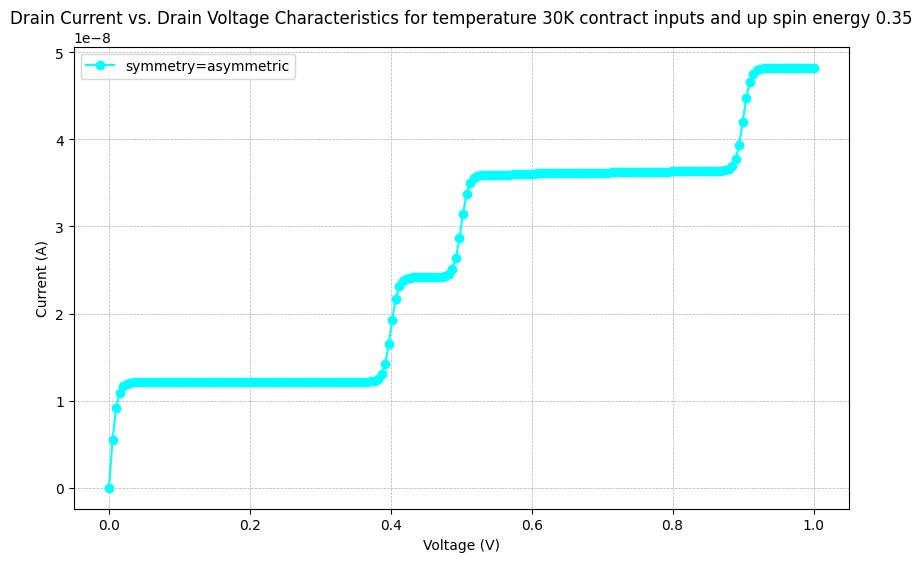

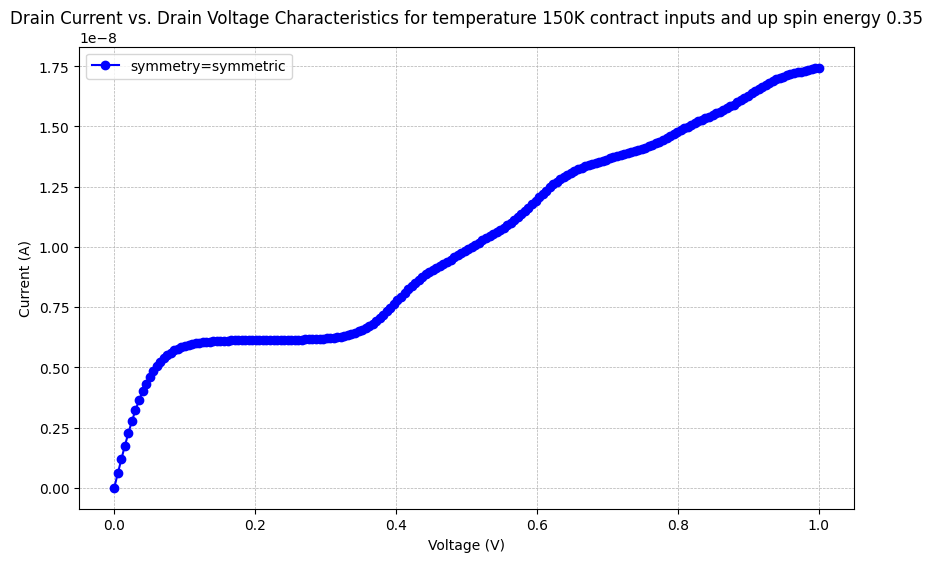

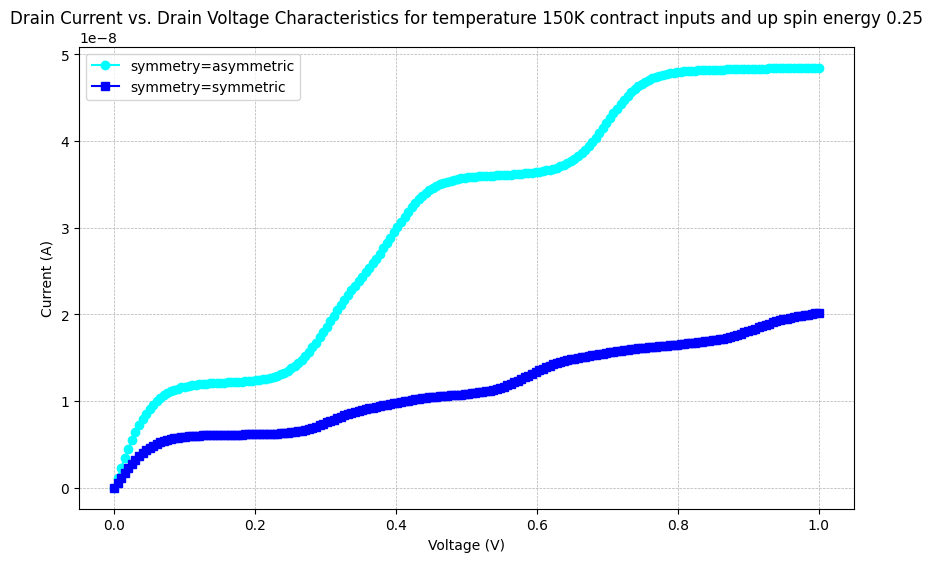

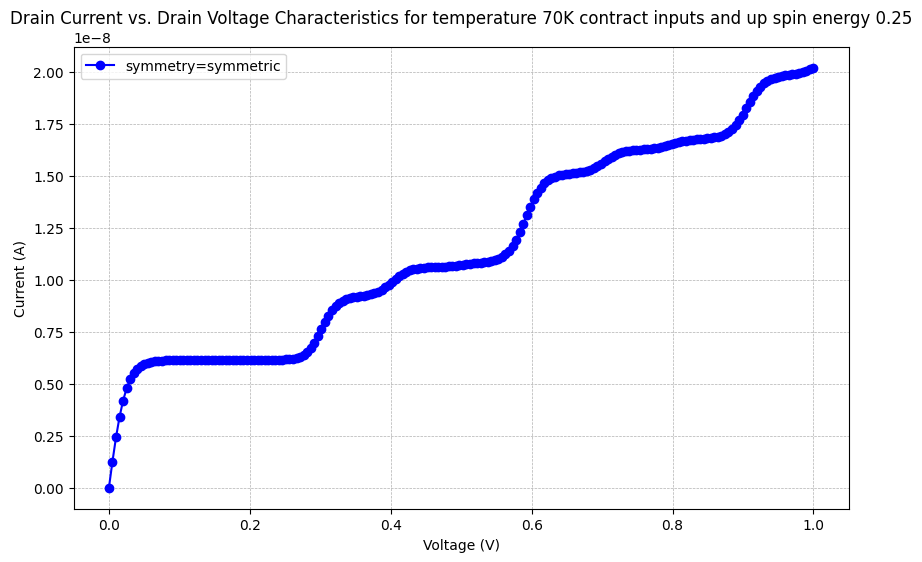

In [6]:
for filenames in symmetry_dict.values():
    files_dict = {}
    for filename in filenames:
        key = filename
        if key not in files_dict:
            files_dict[key] = []

        data = pd.read_csv(os.path.join(base_directory, filename), skiprows=4, names=["Voltage (V)", "Current (A)"])
        data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
        data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

        files_dict[filename].append(data)
        
    plot_datasets(files_dict, log_scale=False, mode='symmetry_dict')

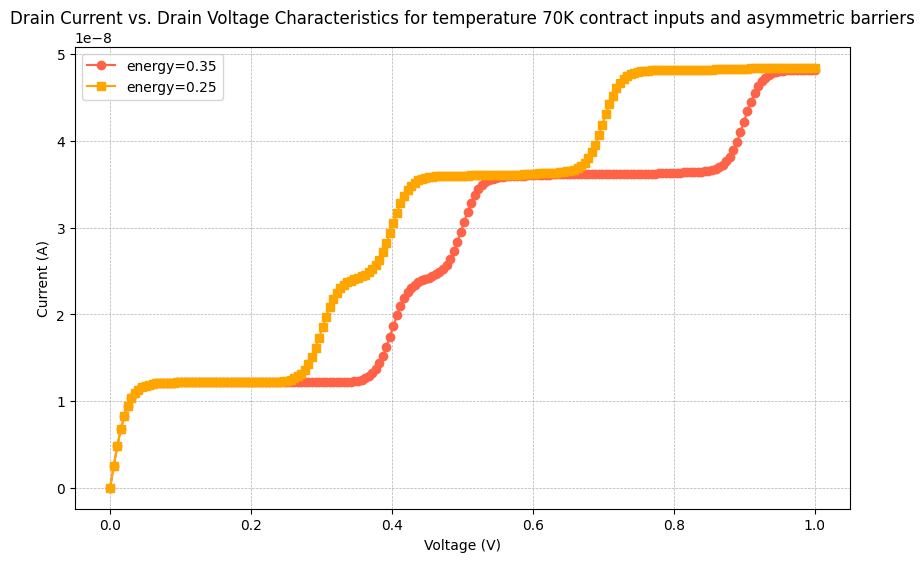

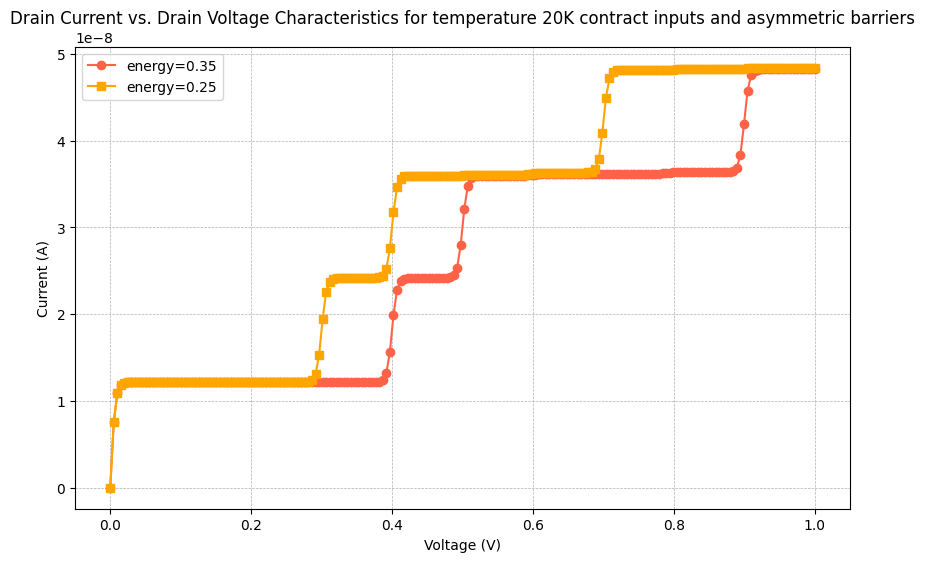

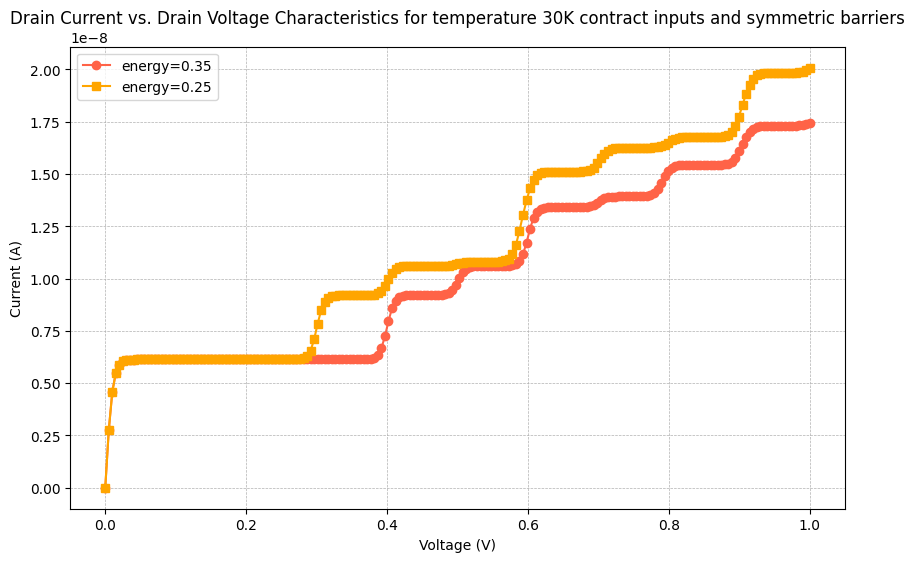

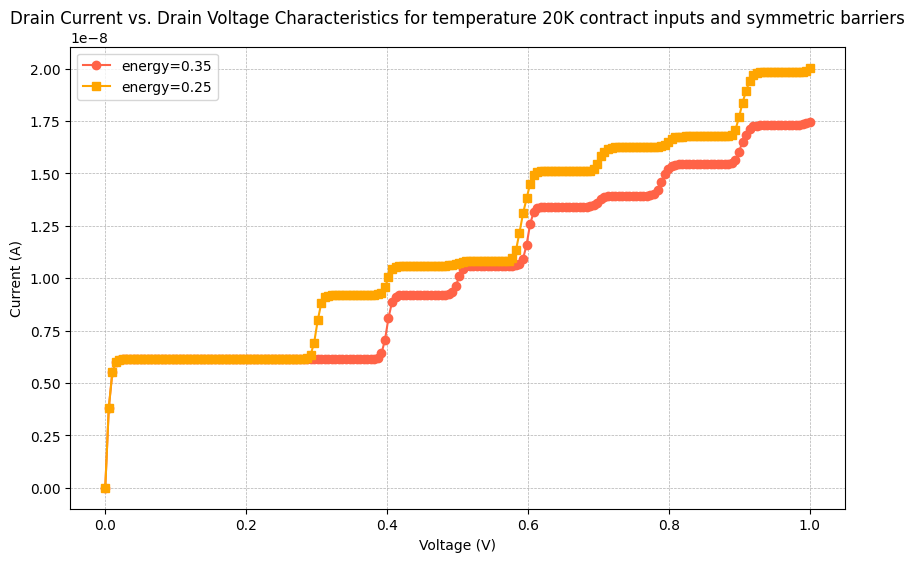

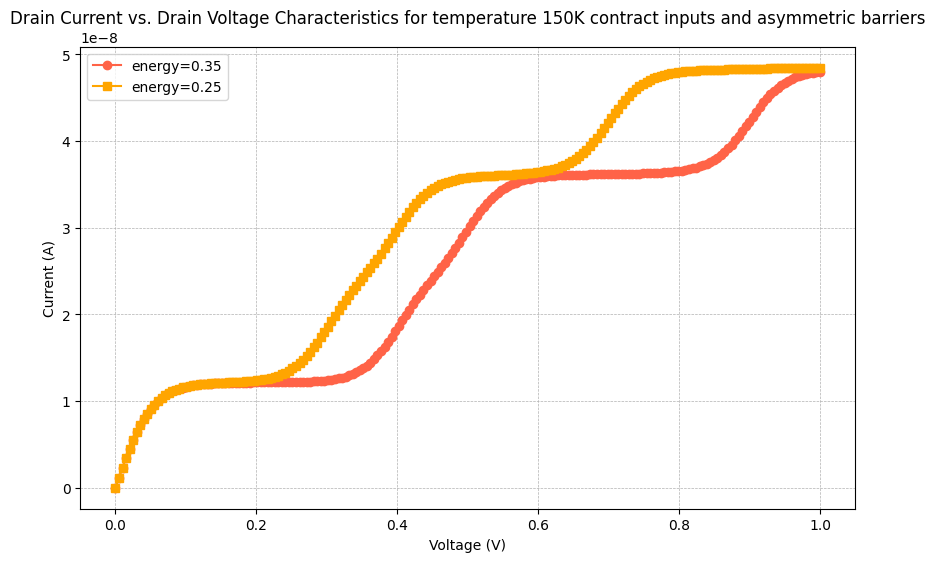

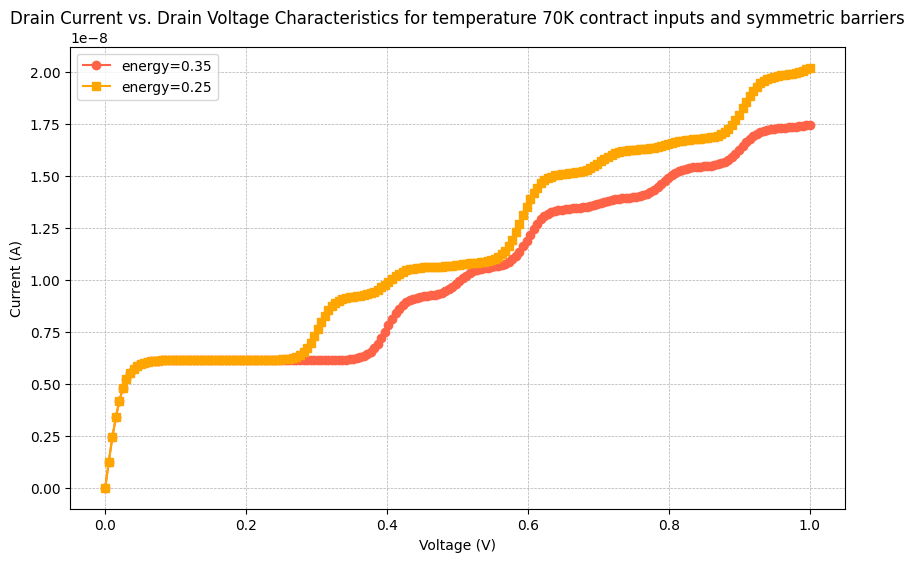

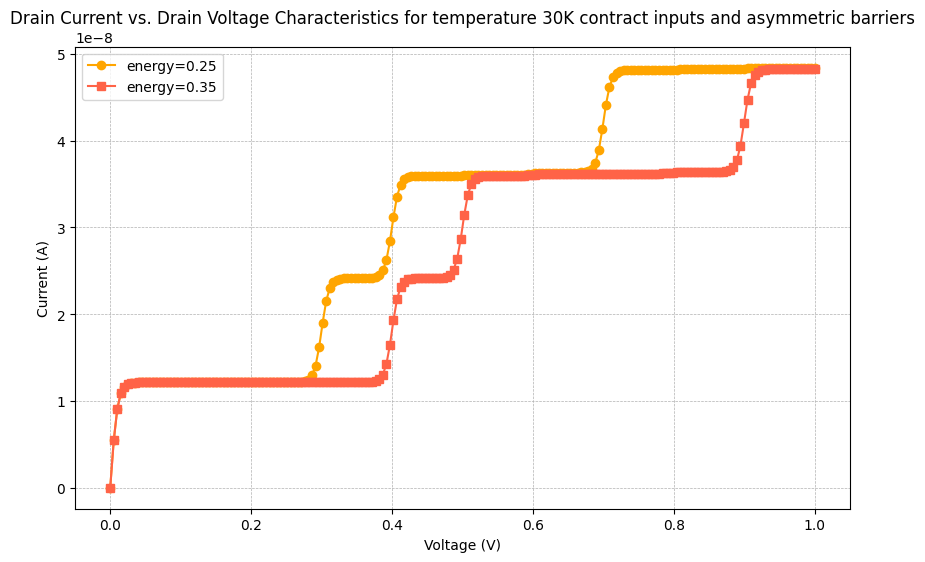

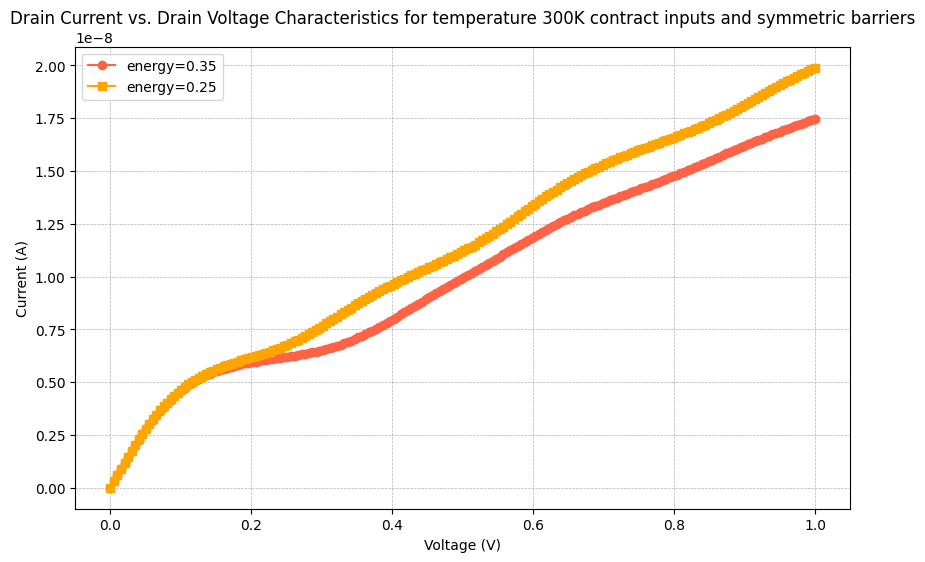

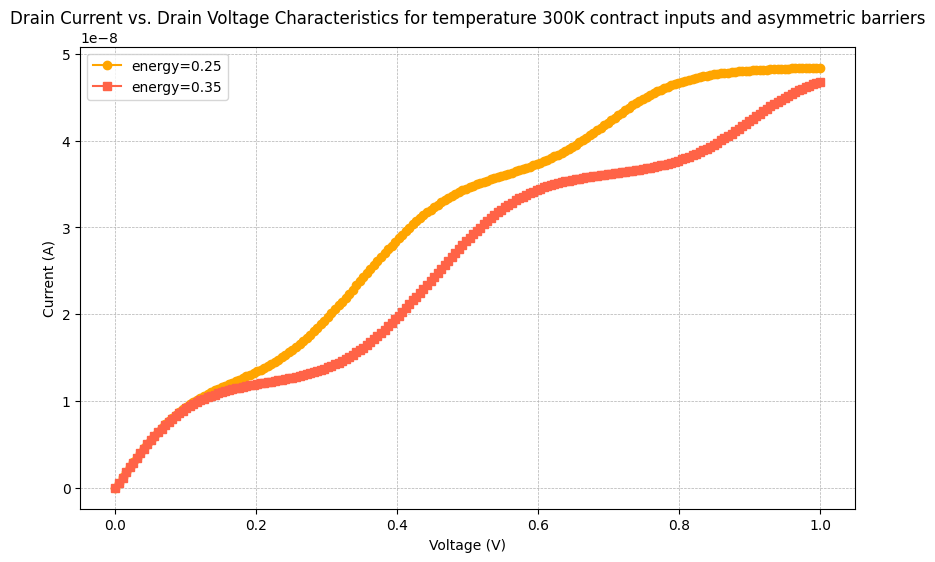

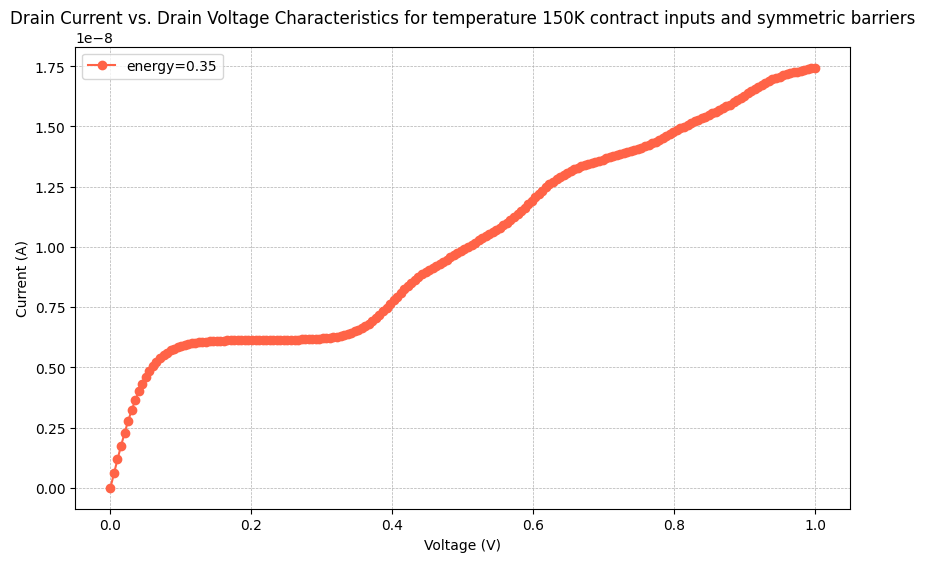

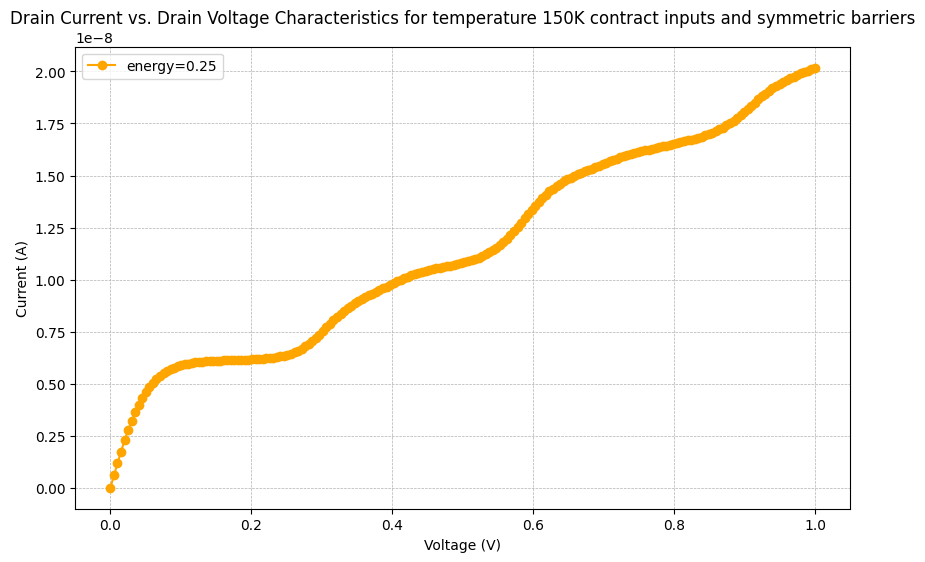

In [7]:
for filenames in energy_dict.values():
    files_dict = {}
    for filename in filenames:
        key = filename
        if key not in files_dict:
            files_dict[key] = []

        data = pd.read_csv(os.path.join(base_directory, filename), skiprows=4, names=["Voltage (V)", "Current (A)"])
        data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
        data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

        files_dict[filename].append(data)
        
    plot_datasets(files_dict, log_scale=False, mode='energy_dict')